## Credit Card Fraud Detection

In [3]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
# import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls
from collections import Counter

# Machine learning libraries
# import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import RobustScaler
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### 1. EDA : Exploration Data Analysis + Feature engineering

### 1-1 Correalation
    - PCA를 한 결과이기 때문에 전체를 보내는 것은 의미 없다
    - 시간과 amount, Class 만 봐보자

- amount와 Class 간의 그래프
    - amount가 낮을 수록 Fraud 일 확률이 높다
    - amount가 심하게 skew 되어 있다. -> 로그를 씌워주자

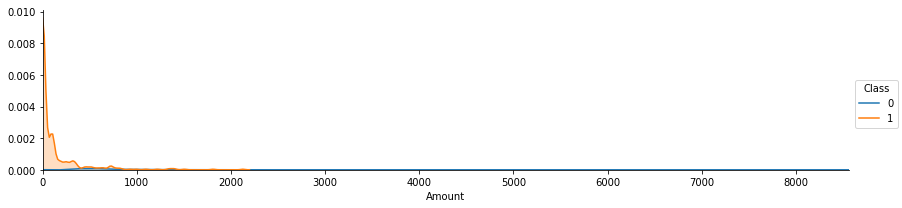

In [6]:
## amount + Class
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( df, hue = 'Class', aspect=4 ) # 여러개의 그림을 그리기
a.map(sns.kdeplot, 'Amount', shade= True ) # 해당하는 모든 그림에 kdeplot 넣기 # 점을 이어준다!
a.set(xlim=(0 , df['Amount'].max()/3))
a.add_legend()

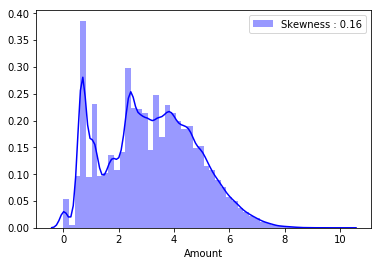

In [7]:
# log(1+Amount) 분포
g= sns.distplot(np.log1p(df["Amount"]), color = 'b', label = "Skewness : %.2f" % np.log1p(df["Amount"]).skew())
g= g.legend(loc= "best")


df['Amount'] = np.log1p(df["Amount"])

- log(1+amount)와 Fraud 발생율 비교
    - Amount가 0.5 미만일때는 Fraud가 발생할 확률이 압도적으로 높다.
    - 1.7 이상일 때는 Class 가 0일 확률이 더 높다.
    - 이러한 Feature를 추가해주자

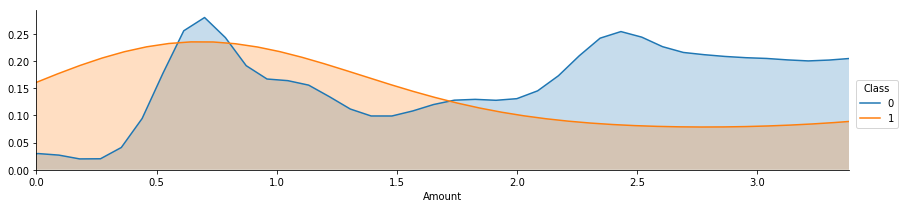

In [8]:
## amount + Class
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( df, hue = 'Class', aspect=4 ) # 여러개의 그림을 그리기
a.map(sns.kdeplot, 'Amount', shade= True ) # 해당하는 모든 그림에 kdeplot 넣기 # 점을 이어준다!
a.set(xlim=(0 , df['Amount'].max()/3))
a.add_legend()

In [9]:
# Feature 추가

def changing(x):
    if x < 0.5 : result = 'A'
    elif x < 1.7 : result = 'B'
    else :result = 'C'
    return result
    
df['Amount_class']= df['Amount'].map(changing)

#### time과 Class 간의 관계
    - 특정 Time에는 Fraud(Class= 1)이 발생할 확률이 더 높다.
    - 정상 Transaction은 발생하는 주기가 있지만, Fraud는 꾸준하다
      즉 특정 시간대에는 Fraud가 일어날 확률이 더 높다고 예측하면 된다.
    - Feature를 추가하자

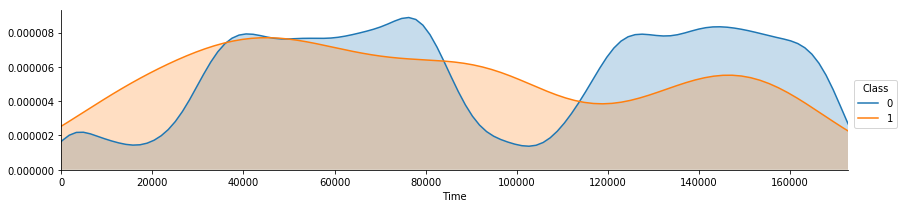

In [10]:
## amount + Class
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( df, hue = 'Class', aspect=4 ) # 여러개의 그림을 그리기
a.map(sns.kdeplot, 'Time', shade= True ) # 해당하는 모든 그림에 kdeplot 넣기 # 점을 이어준다!
a.set(xlim=(0 , df['Time'].max()))
a.add_legend()

In [11]:
# Time Class 변경 : Feature 추가
def temp(x):
    if x<40000 : result = 'A'
    elif   x<82000 : result = 'B'
    elif  x<120000 : result = 'C'
    else : result = 'D'
    return result

df['Time'] = df['Time'].map(temp)

### 2 class 비율 확인하기
    - class 가 1인 것이 너무 적다 !
    - Oversampling, undersampling
        - oversampling은 거짓말이 될 수 있고
          undersampling은 부분만 볼수가 있다. 
    - classfier에서 가중치를 주는 방법이 있다.
    

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

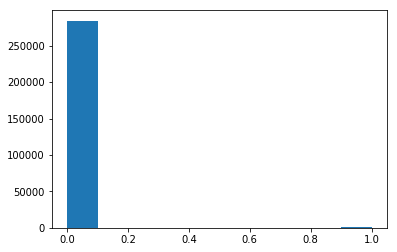

In [12]:
plt.hist(df['Class'],bins = 10)

### 4. Sampling & Data Manipulation
    - downsampling으로 input, output을 만들고 나머지 데이터로 train 데이터를 만들 것
    - train 데이터는 Autoencoder를 구축하는데 사용할 것이고
    - input output은 검증하는데만 사용할 것

In [13]:
df_dummies = pd.get_dummies(df,drop_first = True)

In [14]:
def resampling(x_train, y_train):
    number_fraud = len(y_train[y_train['Class']==1])
    fraud_index = y_train[y_train['Class']==1].index
    normal_index =  y_train[y_train['Class']==0].index

    # random choice , 5배를 가져오자
    random_index =  np.random.choice(normal_index,number_fraud*5,replace = False)
    index = np.concatenate([fraud_index,random_index])

    inputs = x_train.loc[index,:]
    output = y_train.loc[index,:]
    new_idx = [i for i in x_train.index if i not in index]
    
    Xtrain = x_train.loc[new_idx,:]
    Ytrain = y_train.loc[new_idx,:]
    return inputs, output, Xtrain, Ytrain
x_train, y_train = df_dummies.drop('Class', axis =1), df_dummies[['Class']]

inputs, outputs_y, Xtrain, Ytrain = resampling(x_train,y_train)

### 5. Autoencoder Graph 생성

In [15]:
import tensorflow as tf
from functools import partial

In [20]:
tf.reset_default_graph()

learningrate = 0.01
reg = 0.001

X = tf.placeholder(tf.float32, [None, 34])

# initializer
he = tf.contrib.layers.variance_scaling_initializer()

# regularizer
l2 = tf.contrib.layers.l2_regularizer(reg)

# hidden layer
hidden1 = tf.layers.dense(inputs=X, units=25,
                        activation= tf.nn.relu,
                        kernel_initializer = he,
                        kernel_regularizer= l2,name = 'hidden1')
# Coding
hidden2 = tf.layers.dense(inputs= hidden1, units= 15,
                         activation= tf.nn.relu,
                        kernel_initializer = he,
                        kernel_regularizer= l2, name = 'hidden2')

hidden3 = tf.layers.dense(inputs= hidden2, units= 25,
                         activation= tf.nn.relu,
                        kernel_initializer = he,
                        kernel_regularizer= l2, name = 'hidden3')
outputs = tf.layers.dense(inputs = hidden3, units = 34,
                         activation = None,
                         kernel_initializer = he,
                        kernel_regularizer= l2, name = 'outputs')

# Loss: reconstruction loss + l2 loss
reconstructionloss= tf.reduce_mean(tf.square(outputs-X))
# 모든 L2 Variable의 loss 값을 collection 하는 개념
l2loss = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)

loss = tf.add_n([reconstructionloss]+l2loss)

optimizer= tf.train.AdamOptimizer(learningrate).minimize(loss)

# predict = outputs


## Session Run

## Validation
    - Autoencoder에서 나온 결과를 가지고 Loss를 다시 계산해서 Loss가 높으면 학습된것과 다른 것이라고 보겠다!
    


In [22]:
saver = tf.train.Saver()

In [23]:
init = tf.global_variables_initializer()
batchsize = 150
nepoch = 5
result = None
with tf.Session() as sess:
    sess.run(init)
    nbatch = int(Xtrain.shape[0]/batchsize)
    for epoch in range(nepoch):
        for iteration in range(nbatch):
            rand_idx = np.random.choice(len(Xtrain),size = batchsize)
            Xtemp = Xtrain.iloc[rand_idx,:]
            _, cur_loss = sess.run([optimizer, loss], feed_dict = {X:Xtemp})
            
#         if iteration%1000 ==0 :
        print(epoch, cur_loss)
    # Validation
    nbatch = int(inputs.shape[0]/batchsize)+1
    for i in range(nbatch):
        start = i * batchsize
        end = (i+1)*batchsize
        batch = inputs.iloc[start:end,:]
#         print(batch)
        output = sess.run(outputs, feed_dict={X:batch})
        if result is None:
            result = output
        else : 
            result = np.vstack((result, output))
    save_path = saver.save(sess, "./my_model_final.ckpt")
                

0 0.12824227
1 0.11777053
2 0.12116974
3 0.2631552
4 0.14969231


## input과 차이 확인하기

In [106]:
rmse = np.mean(np.power(inputs-result,2),axis =1)
final = pd.DataFrame({'rmse' : rmse,'real_target':outputs_y.Class}).sort_values("rmse",ascending= False)

In [107]:
final.head()

,real_target,rmse
138215,0,131.446910
10690,1,58.144326
154684,1,56.688894
154587,1,55.737086
150677,1,54.900630


# rmse threshold 정해주기

    - 실제 class가 0인 것은 대부분 rmse가 0이지만 class가 1인 것은 분포가 좀 다양하다
    - rmse가 어림잡아 5이상인 것들을 1이라고 치환해보자

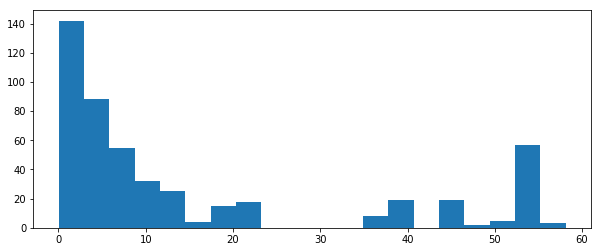

In [122]:
fig = plt.figure(figsize=(10,4))
plt.hist(final[final.real_target>0].rmse,bins=20)
plt.show()

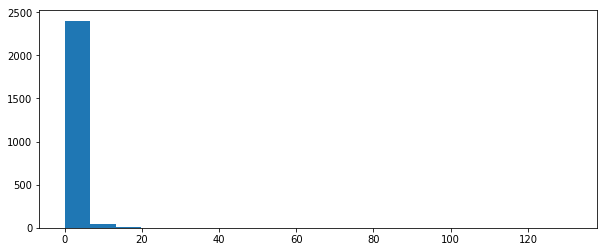

In [123]:
fig = plt.figure(figsize=(10,4))
plt.hist(final[final.real_target==0].rmse,bins=20)
plt.show()

## RMSE 치환

In [140]:
final['predict'] =  final['rmse'].map(lambda x: 1 if x>5 else 0)

In [141]:
final.head()

,real_target,rmse,predict
138215,0,131.446910,1
10690,1,58.144326,1
154684,1,56.688894,1
154587,1,55.737086,1
150677,1,54.900630,1


## 정확도 산출

In [142]:
np.mean(final.real_target == final.predict)

0.8949864498644986

# Confusion matrix

In [143]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[2377   83]
 [ 227  265]]


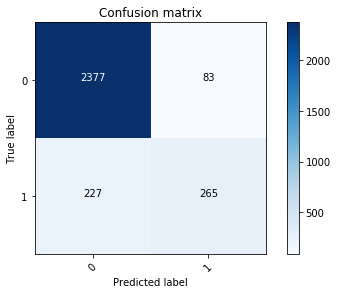

In [144]:
import itertools
from sklearn.metrics import confusion_matrix


cnf_matrix = confusion_matrix(final.real_target, final.predict)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix')


# recall이 낮다!
- 결과를 손수 합치는 것도 괜찮을듯하다 둘중 하나라도 1이라고 하면 1인 것으로 

## Save된 parameter 불러오기

In [24]:
saver = tf.train.Saver()
saver = tf.train.import_meta_graph("./my_model_final.ckpt.meta")

In [25]:
# 현재 graph의 모든 연산 가져오기
for op in tf.get_default_graph().get_operations():
    print(op.name)

Placeholder
hidden1/kernel/Initializer/truncated_normal/shape
hidden1/kernel/Initializer/truncated_normal/mean
hidden1/kernel/Initializer/truncated_normal/stddev
hidden1/kernel/Initializer/truncated_normal/TruncatedNormal
hidden1/kernel/Initializer/truncated_normal/mul
hidden1/kernel/Initializer/truncated_normal
hidden1/kernel
hidden1/kernel/Assign
hidden1/kernel/read
hidden1/kernel/Regularizer/l2_regularizer/scale
hidden1/kernel/Regularizer/l2_regularizer/L2Loss
hidden1/kernel/Regularizer/l2_regularizer
hidden1/bias/Initializer/zeros/shape_as_tensor
hidden1/bias/Initializer/zeros/Const
hidden1/bias/Initializer/zeros
hidden1/bias
hidden1/bias/Assign
hidden1/bias/read
hidden1/MatMul
hidden1/BiasAdd
hidden1/Relu
hidden2/kernel/Initializer/truncated_normal/shape
hidden2/kernel/Initializer/truncated_normal/mean
hidden2/kernel/Initializer/truncated_normal/stddev
hidden2/kernel/Initializer/truncated_normal/TruncatedNormal
hidden2/kernel/Initializer/truncated_normal/mul
hidden2/kernel/Initial

## Board 시각화하기!
    - Tensor board로 보면 보일 것 !!

In [26]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [27]:
show_graph(tf.get_default_graph())

TypeError: Fetch argument None has invalid type <class 'NoneType'>